# 1. 설치

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import matplotlib.pyplot as plt
import nibabel as nib

In [3]:
%cd /content/drive/MyDrive/병주

/content/drive/MyDrive/병주


In [2]:
!git clone --recurse-submodules https://github.com/openvinotoolkit/open_model_zoo.git

Cloning into 'open_model_zoo'...
remote: Enumerating objects: 102145, done.
remote: Counting objects: 100% (4131/4131), done.
remote: Compressing objects: 100% (2062/2062), done.
remote: Total 102145 (delta 2006), reused 3807 (delta 1859), pack-reused 98014
Receiving objects: 100% (102145/102145), 303.92 MiB | 20.25 MiB/s, done.
Resolving deltas: 100% (68523/68523), done.
Submodule 'demos/thirdparty/gflags' (https://github.com/gflags/gflags.git) registered for path 'demos/thirdparty/gflags'
Cloning into '/Users/leebyeongju/Downloads/open_model_zoo/demos/thirdparty/gflags'...
remote: Enumerating objects: 2458, done.        
remote: Counting objects: 100% (71/71), done.        
remote: Compressing objects: 100% (47/47), done.        
remote: Total 2458 (delta 34), reused 50 (delta 24), pack-reused 2387        
Receiving objects: 100% (2458/2458), 1.53 MiB | 4.22 MiB/s, done.
Resolving deltas: 100% (1436/1436), done.
Submodule path 'demos/thirdparty/gflags': checked out 'e171aa2d15ed9eb17

In [3]:
!pip install openvino-dev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 24.8 MB/s eta 0:00:0000:0100:01
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 13.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.7 MB/s eta 0:00:00a 0:00:01
  Using cached opencv_python-4.7.0.68-cp37-abi3-macosx_10_13_x86_64.whl (51.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 24.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 24.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 14.6 MB/s eta 0:00:00
  Using cached urllib3-1.26.14-py2.py3-none-any.whl (140 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Created wheel for jstyleson: filename=jstyleson-0.0.2-py3-none-any.whl size=2385 sha256=d2ad7c6962c32cae847dc16af3499dc76462b1c9f4a5dda958abc6e573c71685
  Stored in directory: /U

## 모델 설치

In [ ]:
!omz_downloader --name brain-tumor-segmentation-0001

################|| Downloading brain-tumor-segmentation-0001 ||################

========== Downloading /content/drive/MyDrive/병주/public/brain-tumor-segmentation-0001/brain-tumor-segmentation-0001-symbol.json
... 100%, 97 KB, 273 KB/s, 0 seconds passed

========== Downloading /content/drive/MyDrive/병주/public/brain-tumor-segmentation-0001/brain-tumor-segmentation-0001-0000.params
... 100%, 149207 KB, 18188 KB/s, 8 seconds passed



In [4]:
!omz_downloader --name brain-tumor-segmentation-0002

################|| Downloading brain-tumor-segmentation-0002 ||################

========== Downloading /Users/leebyeongju/Downloads/public/brain-tumor-segmentation-0002/brain-tumor-segmentation-0002.onnx
... 100%, 21225 KB, 7823 KB/s, 2 seconds passed



# 2. inference

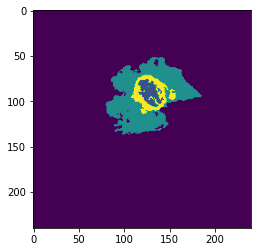

In [ ]:
#train 첫번째 정답
mask =nib.load("/content/drive/MyDrive/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii").get_fdata()
plt.imshow(mask[:,:,70])



In [3]:
!python3 3d_segmentation_demo2.py -i 'data' -o 'data/output' -m '/Users/leebyeongju/Downloads/public/brain-tumor-segmentation-0002/brain-tumor-segmentation-0002.onnx' -nii -ms 0,3,1,2 --full_intensities_range

[ INFO ] OpenVINO Runtime
[ INFO ] 	build: 2022.3.0-9052-9752fafe8eb-releases/2022/3
[ INFO ] Reading model /Users/leebyeongju/Downloads/public/brain-tumor-segmentation-0002/brain-tumor-segmentation-0002.onnx
[ INFO ] The model /Users/leebyeongju/Downloads/public/brain-tumor-segmentation-0002/brain-tumor-segmentation-0002.onnx is loaded to CPU
/Users/leebyeongju/Desktop/segmentation visualize/3d_segmentation_demo2.py:192: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  image = image_handle.get_data().astype(np.float32)
/Users/leebyeongju/Desktop/segmentation visualize/3d_segmentation_demo2.py:178: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.

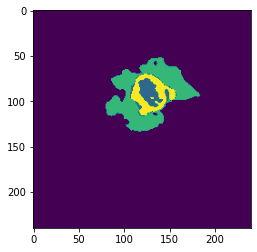

In [ ]:
# 모델의 예측값
output= nib.load('/content/drive/MyDrive/병주/output/train_output/output_0.nii.gz').get_fdata()
plt.imshow(output[:,:,70])

In [ ]:
!python3 /content/drive/MyDrive/병주/open_model_zoo/demos/3d_segmentation_demo/python/3d_segmentation_demo2.py -i '/content/drive/MyDrive/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002' -o '/content/drive/MyDrive/병주/output/train_output2' -m '/content/drive/MyDrive/병주/public/brain-tumor-segmentation-0002/brain-tumor-segmentation-0002.onnx' -nii -ms 0,3,1,2 --full_intensities_range

[ INFO ] OpenVINO Runtime
[ INFO ] 	build: 2022.3.0-9052-9752fafe8eb-releases/2022/3
[ INFO ] Reading model /content/drive/MyDrive/병주/public/brain-tumor-segmentation-0002/brain-tumor-segmentation-0002.onnx
[ INFO ] The model /content/drive/MyDrive/병주/public/brain-tumor-segmentation-0002/brain-tumor-segmentation-0002.onnx is loaded to CPU
/content/drive/MyDrive/병주/open_model_zoo/demos/3d_segmentation_demo/python/3d_segmentation_demo2.py:192: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  image = image_handle.get_data().astype(np.float32)
/content/drive/MyDrive/병주/open_model_zoo/demos/3d_segmentation_demo/python/3d_segmentation_demo2.py:178: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, th

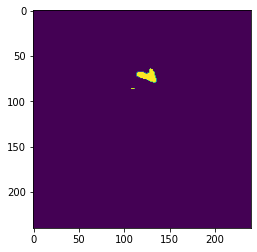

In [ ]:
output2= nib.load('/content/drive/MyDrive/병주/output/train_output2/output_0.nii.gz').get_fdata()
plt.imshow(output2[:,:,79])

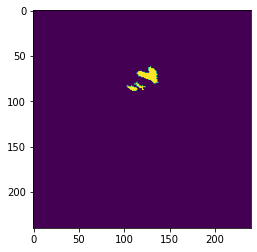

In [ ]:
mask2= nib.load('/content/drive/MyDrive/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_seg.nii').get_fdata()
plt.imshow(mask2[:,:,79])

### validation 에서 확인

In [ ]:
!python3 /content/drive/MyDrive/병주/open_model_zoo/demos/3d_segmentation_demo/python/3d_segmentation_demo2.py -i '/content/drive/MyDrive/dataset/BraTS2020/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_001' -o '/content/drive/MyDrive/병주/output/validation_output' -m '/content/drive/MyDrive/병주/public/brain-tumor-segmentation-0002/brain-tumor-segmentation-0002.onnx' -nii -ms 0,3,1,2 --full_intensities_range

[ INFO ] OpenVINO Runtime
[ INFO ] 	build: 2022.3.0-9052-9752fafe8eb-releases/2022/3
[ INFO ] Reading model /content/drive/MyDrive/병주/public/brain-tumor-segmentation-0002/brain-tumor-segmentation-0002.onnx
[ INFO ] The model /content/drive/MyDrive/병주/public/brain-tumor-segmentation-0002/brain-tumor-segmentation-0002.onnx is loaded to CPU
/content/drive/MyDrive/병주/open_model_zoo/demos/3d_segmentation_demo/python/3d_segmentation_demo2.py:192: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  image = image_handle.get_data().astype(np.float32)
/content/drive/MyDrive/병주/open_model_zoo/demos/3d_segmentation_demo/python/3d_segmentation_demo2.py:178: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, th

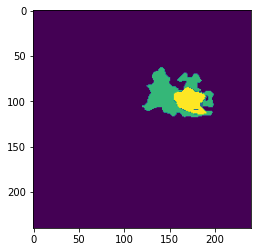

In [ ]:
val_output= nib.load('/content/drive/MyDrive/병주/output/validation_output/output_0.nii.gz').get_fdata()
plt.imshow(val_output[:,:,95])

## 시각화

In [ ]:
!git clone https://github.com/adamkwolf/3d-nii-visualizer.git

Cloning into '3d-nii-visualizer'...
remote: Enumerating objects: 360, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 360 (delta 0), reused 1 (delta 0), pack-reused 356
Receiving objects: 100% (360/360), 164.45 MiB | 65.96 MiB/s, done.
Resolving deltas: 100% (188/188), done.


In [ ]:
pip install PyQt5 vtk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 KB 42.6 MB/s eta 0:00:00


In [ ]:
!python3 /content/3d-nii-visualizer/visualizer/brain_tumor_3d.py -i "/content/drive/MyDrive/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii.gz" -m "/content/drive/MyDrive/병주/output/train_output/output_0.nii.gz"

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl, xcb.



In [ ]:
import os 
os.system('gzip ' + '/content/drive/MyDrive/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii')

0